In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

## Defining numu sidebands

In [3]:
RUN = ["3b","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 1
get_rundict: run_number= 3b
The sideband data you're using had the following query applied:
n_muons_tot > 0 and run>=14114
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 1
get_rundict: run_number= 4b
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 1
get_rundict: run_number= 4c
The sideband data you're using had the following qu

In [4]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

In [47]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")

numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

numu_binning_inclusive = numu_binning.copy()
numu_binning_inclusive.label = "NUMUCRT"
numu_binning_inclusive.set_selection(preselection="NUMUCRT", selection="NUMUCRT")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi, numu_binning_inclusive])

In [48]:
from microfit.histogram import RunHistGenerator

sideband_generator = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
)

Text(0.5, 1.0, '$\\nu_\\mu$ Sidebands')

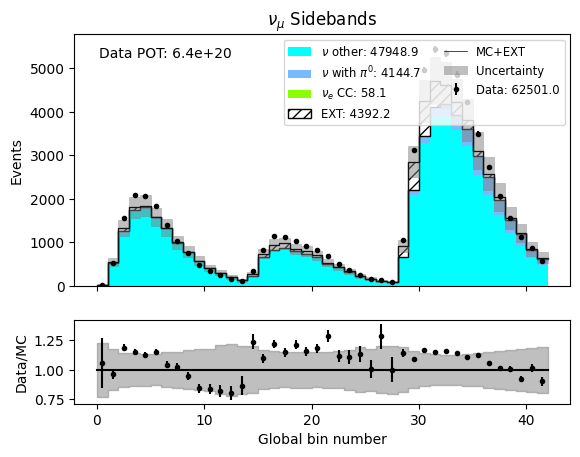

In [50]:
from microfit.run_plotter import RunHistPlotter

ax, ax_ratio = RunHistPlotter(sideband_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
)
ax.set_title(r"$\nu_\mu$ Sidebands")

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

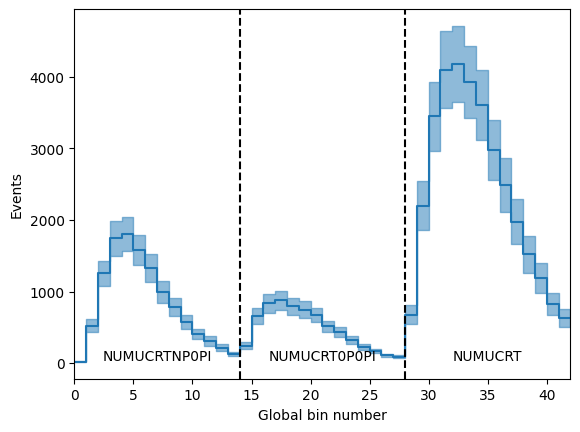

In [52]:
combined_sideband_hist = sideband_generator.get_mc_hist(include_multisim_errors=True)
combined_sideband_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

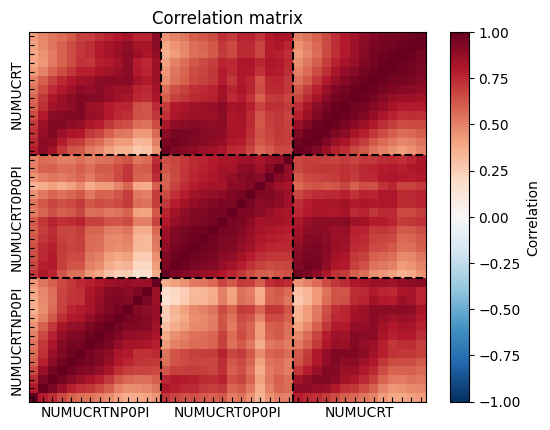

In [53]:
combined_sideband_hist.draw_covariance_matrix()

## Define two-shower sideband

In [14]:
RUN = ["3b","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="two_shr_sideband",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

get_rundict: run_number= 1
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 3b
get_rundict: run_number= 1
get_rundict: run_number= 3b
The sideband data you're using had the following query applied:
n_showers_contained >= 2 and run>=14114
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 1
get_rundict: run_number= 4b
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 1
get_rundict: run_number= 4c
The sideband data you're using ha

In [15]:
two_shr_sideband_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
two_shr_sideband_binning.label = "TWOSHR"

two_shr_sideband_generator = RunHistGenerator(
    rundata,
    two_shr_sideband_binning,
    data_pot=data_pot,
    selection="ZPLOOSESELTWOSHR",
    preselection="ZPTwoShrCRT",
)

(<AxesSubplot:title={'center':'1e0p Presel. w/ CRT, 2+ shower and 1e0p loose sel. 2+ shr'}, ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

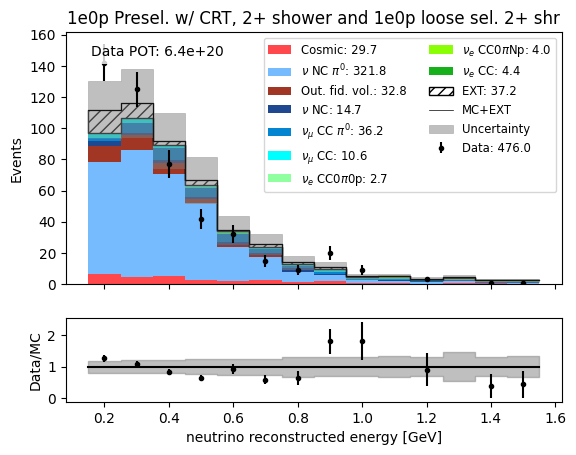

In [16]:
RunHistPlotter(two_shr_sideband_generator).plot(category_column="category", include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,)

## Load the signals

In [20]:
RUN = ["1","2","3","4b","4c","4d","5"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
Loading lee sample
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
Loading lee sample
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
Loading lee sample
get_rundict: run_number= 4b


In [21]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

signal_binning = MultiChannelBinning([binning_npl, binning_zpl])

In [73]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator


signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)

(0.0, 35.0)

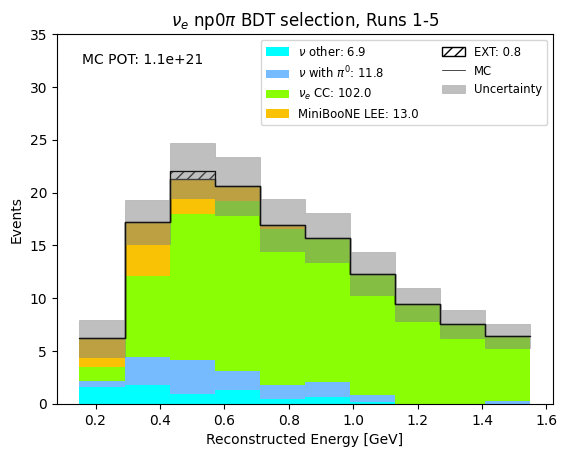

In [74]:
ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",
)
ax.set_title(r"$\nu_e$ np0$\pi$ BDT selection, Runs 1-5")
ax.set_ylim((0, 35))

(0.0, 35.0)

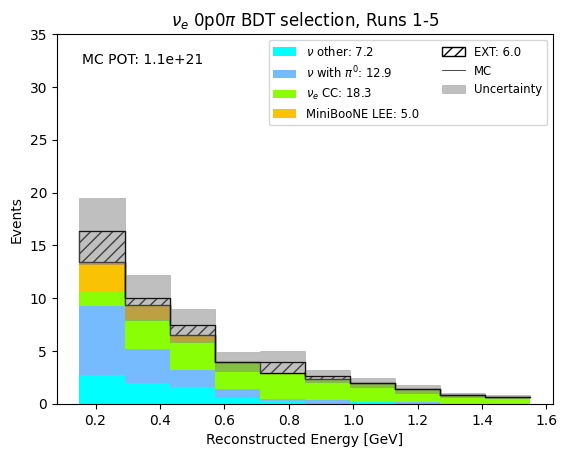

In [75]:
ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="ZPBDT",
)
ax.set_title(r"$\nu_e$ 0p0$\pi$ BDT selection, Runs 1-5")
ax.set_ylim((0, 35))

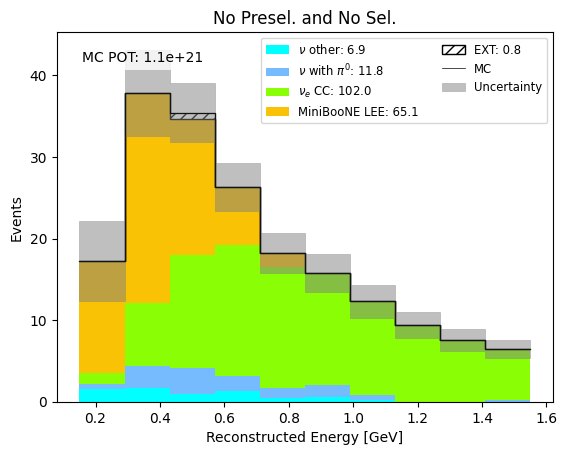

In [79]:
signal_generator.parameters["signal_strength"].value = 5.0

ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",
)

## Assemble Analysis

In [105]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[sideband_generator, two_shr_sideband_generator, signal_generator],
    constraint_channels=["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"],
    signal_channels=["NPBDT", "ZPBDT"],
)


In [106]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [107]:
analysis.parameters["signal_strength"].value = 1.0

multi_channel_mc_hist = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    include_non_signal_channels=True,
)

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

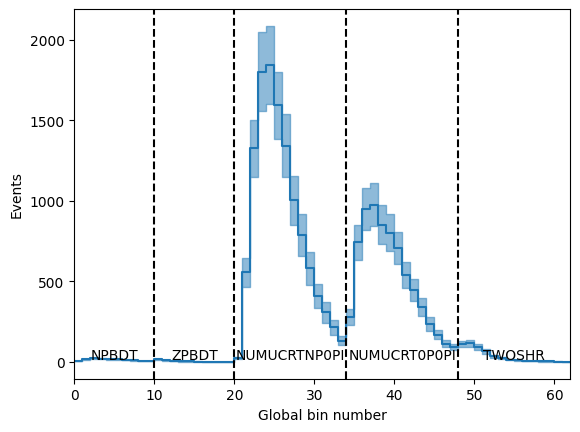

In [108]:
multi_channel_mc_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

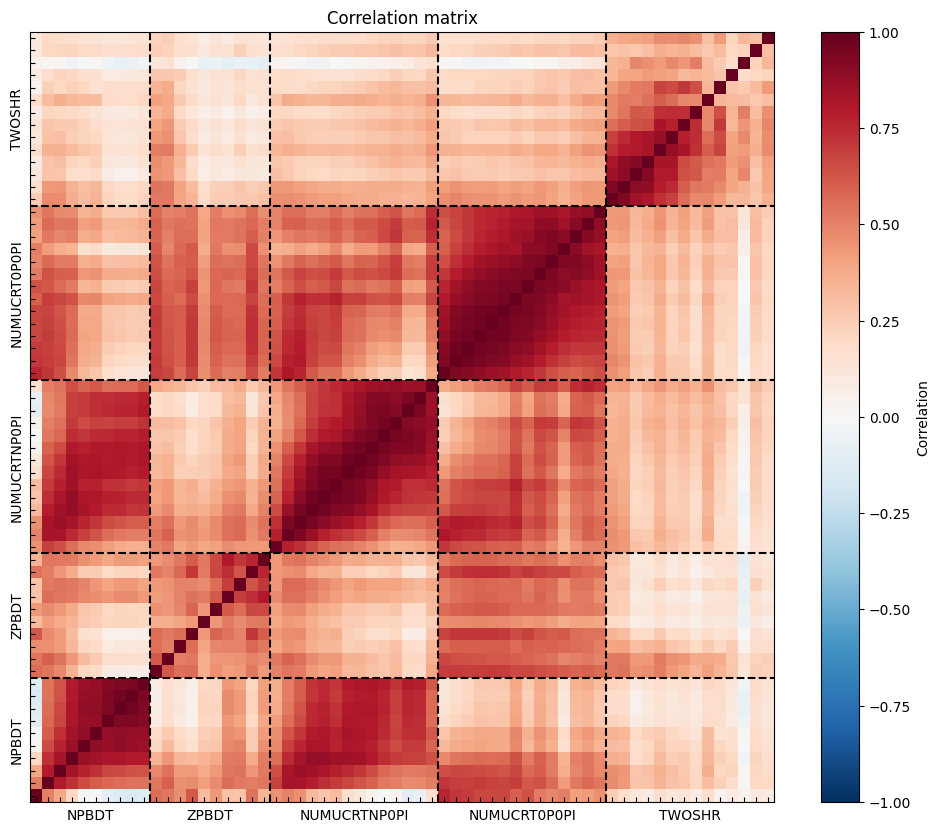

In [109]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
# Getting the channels in the same order as in Giuseppe's plots
channels = ["NPBDT", "ZPBDT", "NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
multi_channel_mc_hist[channels].draw_covariance_matrix(ax=ax)

In [110]:
multi_channel_hist_unconstrained = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=False,
)

multi_channel_hist_new_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"],
)

multi_channel_hist_old_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,
    constraint_channels=["NUMUCRT"],
)

Text(0.5, 1.0, 'Signal Channels, Runs 1-5, MC+EXT')

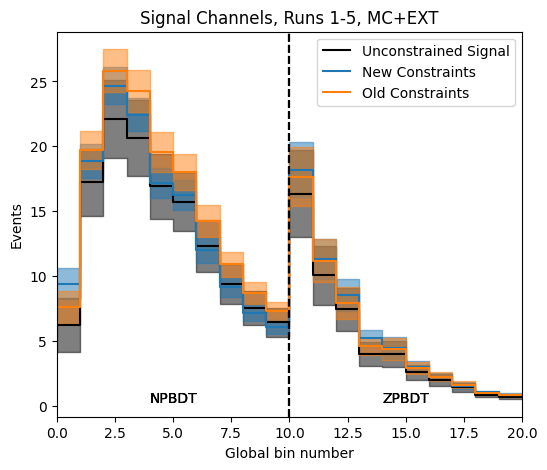

In [112]:
fig, ax = plt.subplots(figsize=(6, 5))
multi_channel_hist_unconstrained.draw(ax=ax, label="Unconstrained Signal", color="black")

multi_channel_hist_new_constraints.draw(ax=ax, label="New Constraints")
multi_channel_hist_old_constraints.draw(ax=ax, label="Old Constraints")
ax.legend()
ax.set_title("Signal Channels, Runs 1-5, MC+EXT")


## Get the Sensitivity

In [113]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_new_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

In [117]:
analysis.constraint_channels = ["NUMUCRT"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_old_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    n_trials=10000,
)

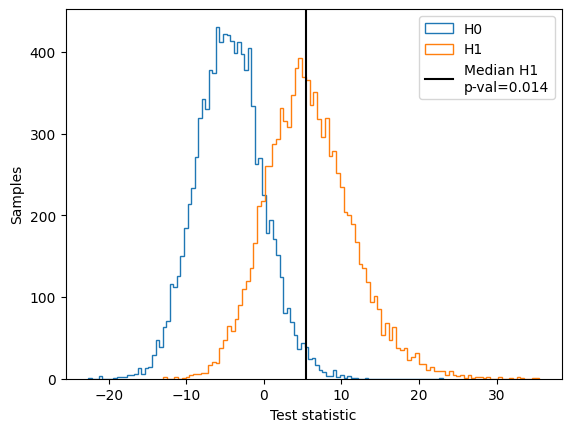

In [118]:
plt.hist(two_hypo_result_old_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_old_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_old_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_old_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel("Test statistic")
plt.ylabel("Samples")
plt.show()

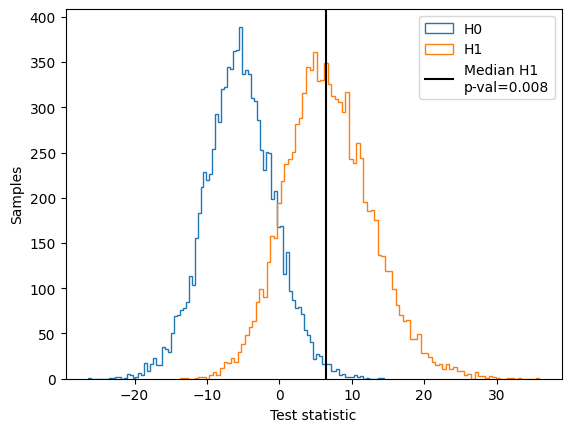

In [116]:
plt.hist(two_hypo_result_new_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_new_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_new_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_new_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel("Test statistic")
plt.ylabel("Samples")
plt.show()